Accuracy: 0.845
Precision: 0.8478616584367511
Recall: 0.845
F1 Score: 0.8443203721795927
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        55
           1       0.89      0.77      0.83        71
           2       0.83      0.86      0.85        74

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.84      0.84       200

Confusion Matrix:
 [[50  1  4]
 [ 7 55  9]
 [ 4  6 64]]


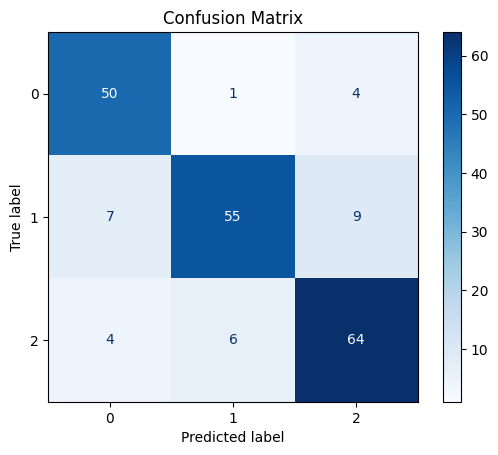

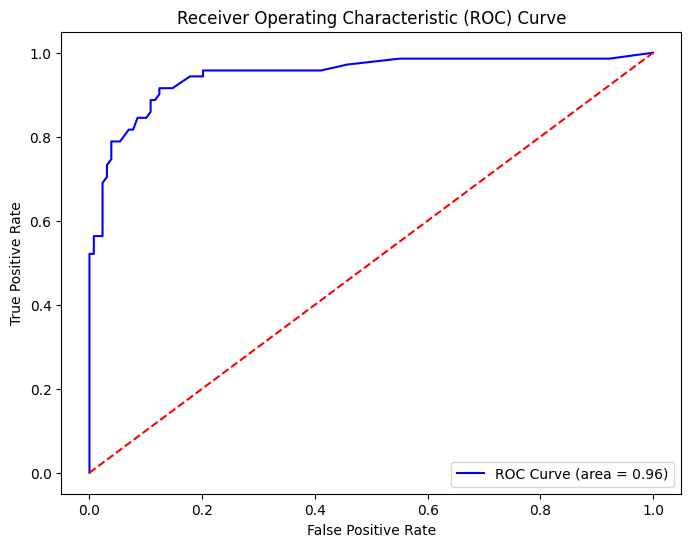

In [5]:
#### Libraries import
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons, make_classification

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve, auc, RocCurveDisplay


#### Generate synthetic dataset
X,y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, n_redundant=2, random_state=42)
#X,y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

#### Vusualize the dataset
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
# plt.title("Synthetic Dataset Visualization")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()

#### Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=26)
clf.fit(X_train, y_train)

#### Make predictions
y_pred = clf.predict(X_test)

#### Make evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Pour un problème multi-classes, spécifiez le paramètre multi_class
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(
    roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



